<a href="https://colab.research.google.com/github/Oscar52analitica/Data-Science-II-Machine-Learning-para-la-Ciencia-de-Datos/blob/main/Exploratory_Data_Analysis_(EDA)_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASE 10 - EDA
### Coderhouse - Data Science
Profe Jorge Ruiz

# Exploratory Data Analysis (EDA)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Empecemos importando las librerias y el dataset a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

wine_quality = pd.read_csv("winequality-red.csv", sep = ",")

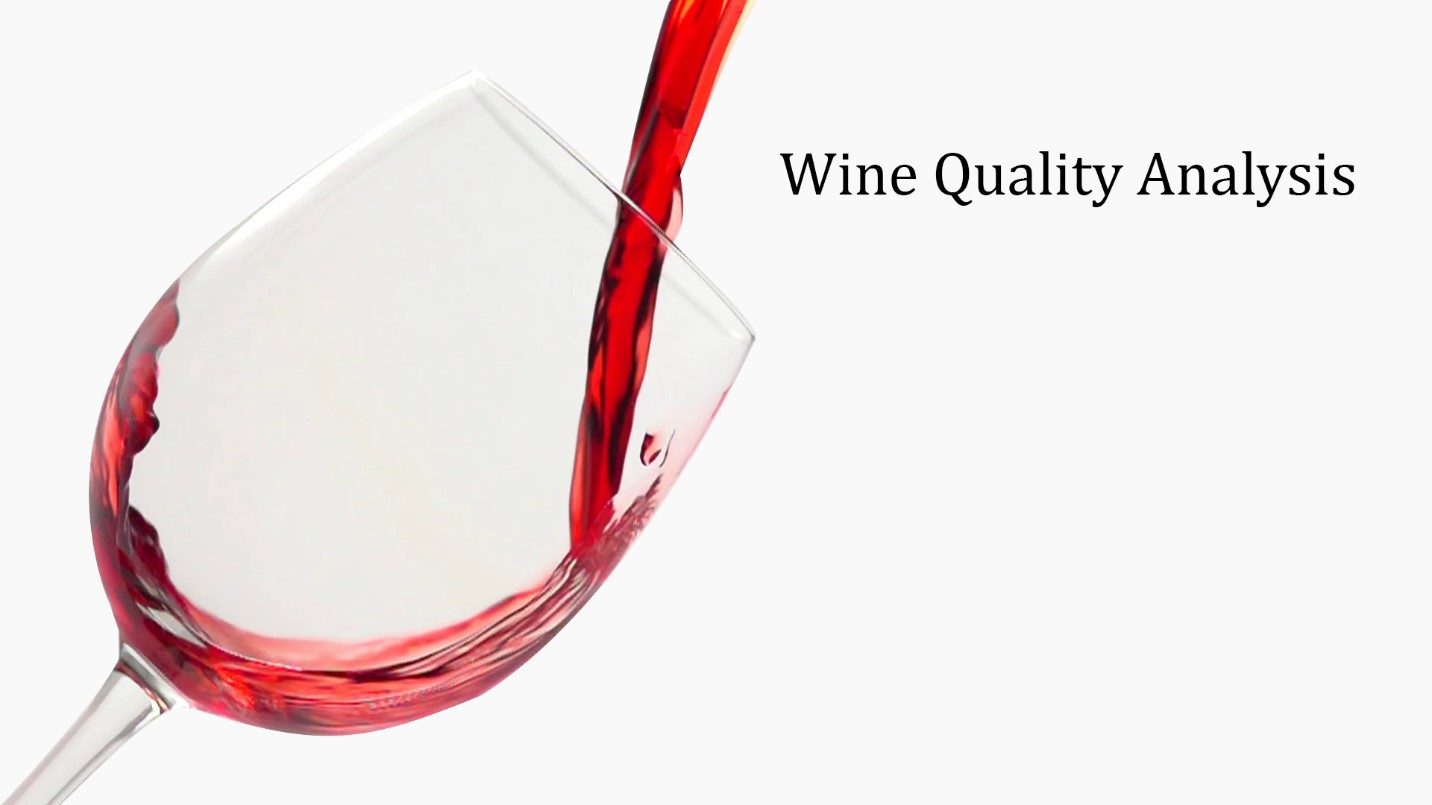

In [ ]:
#Veamos las 5 ultimas filas
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
#Dimension del dataset
print(wine_quality.shape)

(1599, 12)


¿Qué variables tenemos?
Lo primero que hay que hacer es tratar de identificar el tipo de variables que tenemos y cuáles son los features y el target.

In [ ]:
#Nombre de los atributos
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Probablemente si no somos conocedores de vinos, estas variables tengan poco sentido para nosotros. Recordemos que idealmente, deberíamos tener conocimiento del tema sobre el cual vamos a trabajar (obvio que también podemos conseguir un experto que nos guíe 😉).

Para mayor información sobre el significado de cada variable, podemos acceder a los siguientes links:
* https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid
* https://waterhouse.ucdavis.edu/whats-in-wine
* https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
* https://www.mt.com/gb/en/home/supportive_content/ana_chem_applications/titration/AP015.html

**Completitud en los datos**:
Antes de comenzar cualquier análisis, es bueno revisar los datos para buscar información faltante; y en caso de que la haya, decidir qué es lo que podemos hacer con esos registros faltantes. Con los dataframes de pandas, podemos usar la función info() para encontrar los datos faltantes.

In [ ]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_quality.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
wine_quality.duplicated().sum()

240

In [ ]:
# Identificar duplicados basados en todas las columnas

wine_quality[wine_quality.duplicated()].sort_values(by="fixed acidity")

#wine_quality[wine_quality.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1491,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
997,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
132,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
831,5.9,0.610,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6
603,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6
391,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7


In [ ]:
"""
Si bien puede ser valido eliminar valores duplicados en todas las columnas, si son mediciones de laboratorio
es bastante común encontrar mediciones identicas si vienen de una misma muestra.
"""


#wine_quality.drop_duplicates(inplace=True)



'\nSi bien puede ser valido eliminar valores duplicados en todas las columnas, si son mediciones de laboratorio\nes bastante común encontrar mediciones identicas si vienen de una misma muestra.\n'

In [ ]:
#proporción de valores faltantes en el conjunto de datos wine_quality.

wine_quality.isnull().sum()/len(wine_quality)*100

,0
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


# Estadísticas descriptivas

In [ ]:
#Utilicemos la funcion round para visualizar mejor nuestros datos
wine_quality.describe().round(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


<Axes: xlabel='quality', ylabel='Density'>

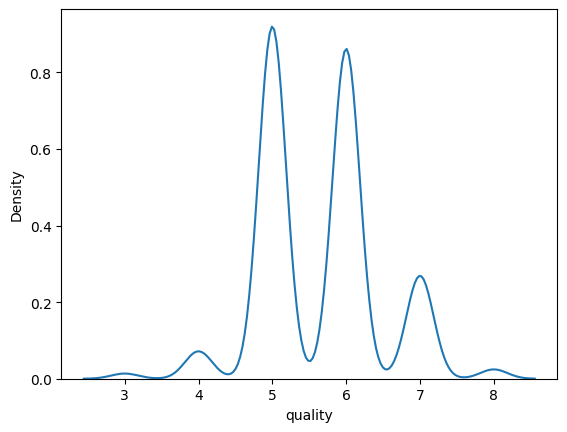

In [ ]:
#Histograma
from seaborn import distplot
distplot(wine_quality.quality, hist=False)

Como podemos observar, nuestro conjunto de datos está desbalanceado, con muchos mas 5 y 6 que cualquier otro valor.

<Axes: xlabel='residual sugar', ylabel='Count'>

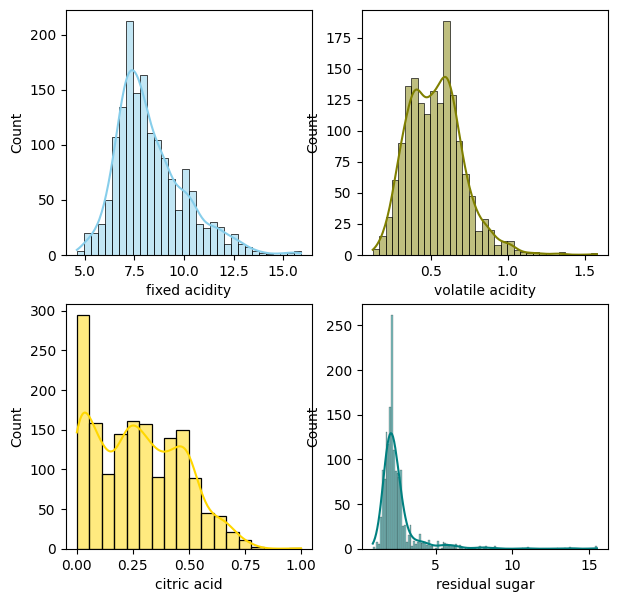

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=wine_quality, x="fixed acidity", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=wine_quality, x="volatile acidity", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=wine_quality, x="citric acid", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=wine_quality, x="residual sugar", kde=True, color="teal", ax=axs[1, 1])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

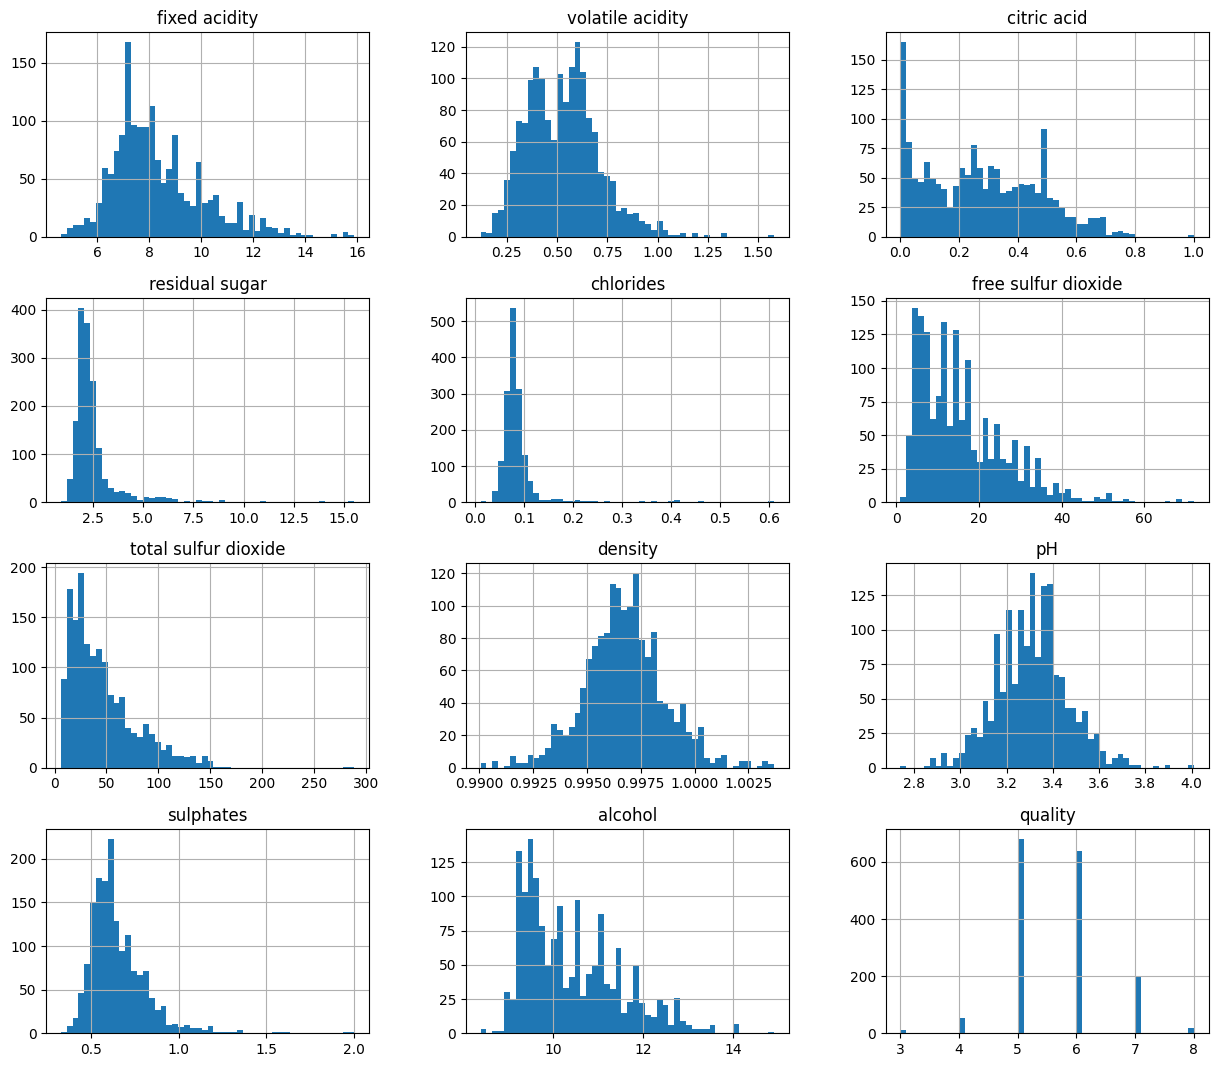

In [ ]:
# una forma sencilla de hacer lo mismo que antes
wine_quality.hist(figsize=(15,13),bins=50)

De esta gráfica podemos identificar varios aspectos, como ser por ejemplo que  muchas de las variables tienen una distribución asimétrica (fixed acidity, residual sugar, chlorides, por ejemplo), además de que al parecer algunos valores presentan valores extremos (residual sugar, sulphates, total sulfur dioxide).

# Boxplots
Como sabemos los boxplots nos permiten analizar y ver de una manera muy rápida qué variables tienen valores extremos.

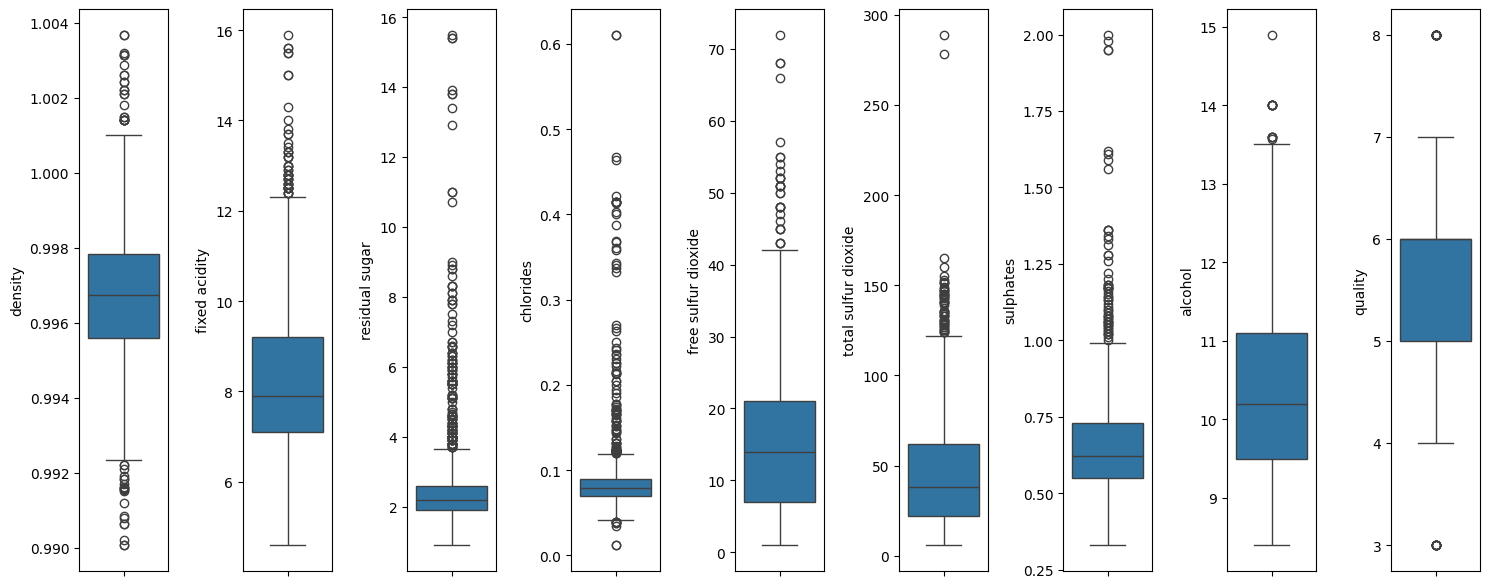

In [ ]:
# recomendado este paso cuando las variables tienen diferente naturaleza/escala

variables = ["density",'fixed acidity', 'residual sugar',
             'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide','sulphates', 'alcohol', "quality"]

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=wine_quality, ax=ax)
plt.tight_layout() #se utiliza para ajustar automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.

<Axes: >

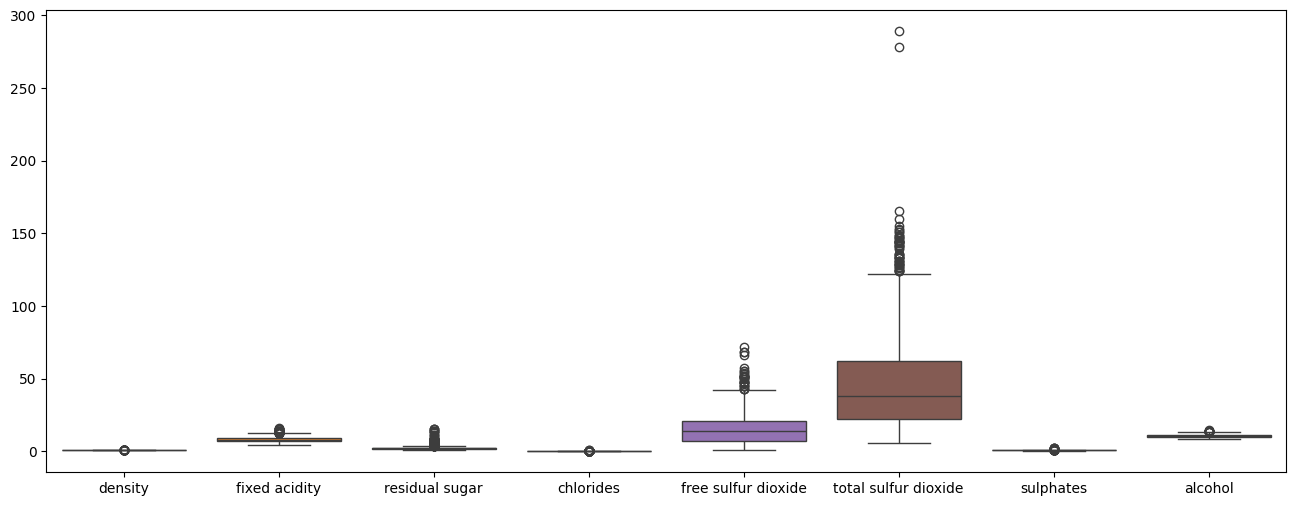

In [ ]:
# NO recomendado para variables de distinta naturaleza.

# Crear una figura y un eje con tamaño personalizado
fig, ax = plt.subplots(figsize=(16, 6))  # Ajusta los valores (ancho, alto) según tus preferencias

# Crear el boxplot
sns.boxplot(data=wine_quality[["density",'fixed acidity', 'residual sugar',
             'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide','sulphates', 'alcohol']], ax=ax)

# Scatterplots
Ahora tratemos de identificar de una manera rápida y visual la correlación entre variables!

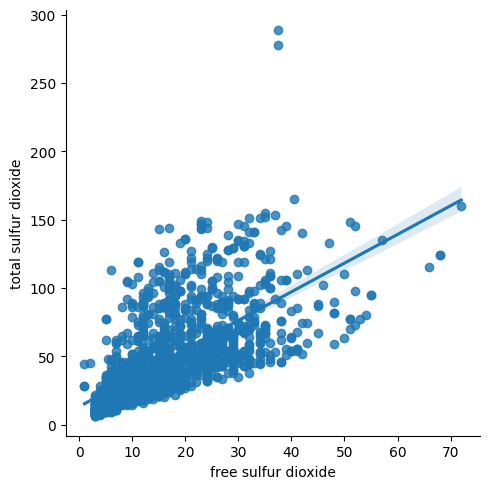

In [ ]:
from seaborn import lmplot
lmplot(x='free sulfur dioxide', y='total sulfur dioxide', data=wine_quality, fit_reg=True)

En la gráfica anterior, si se puede observar una clara relación entre las variables analizadas. También podemos
hacer uso de la Matriz de Correlación si quisieramos ver por ejemplo el coeficiente de **Pearson**

In [ ]:
correlation = wine_quality.corr(method="pearson")
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


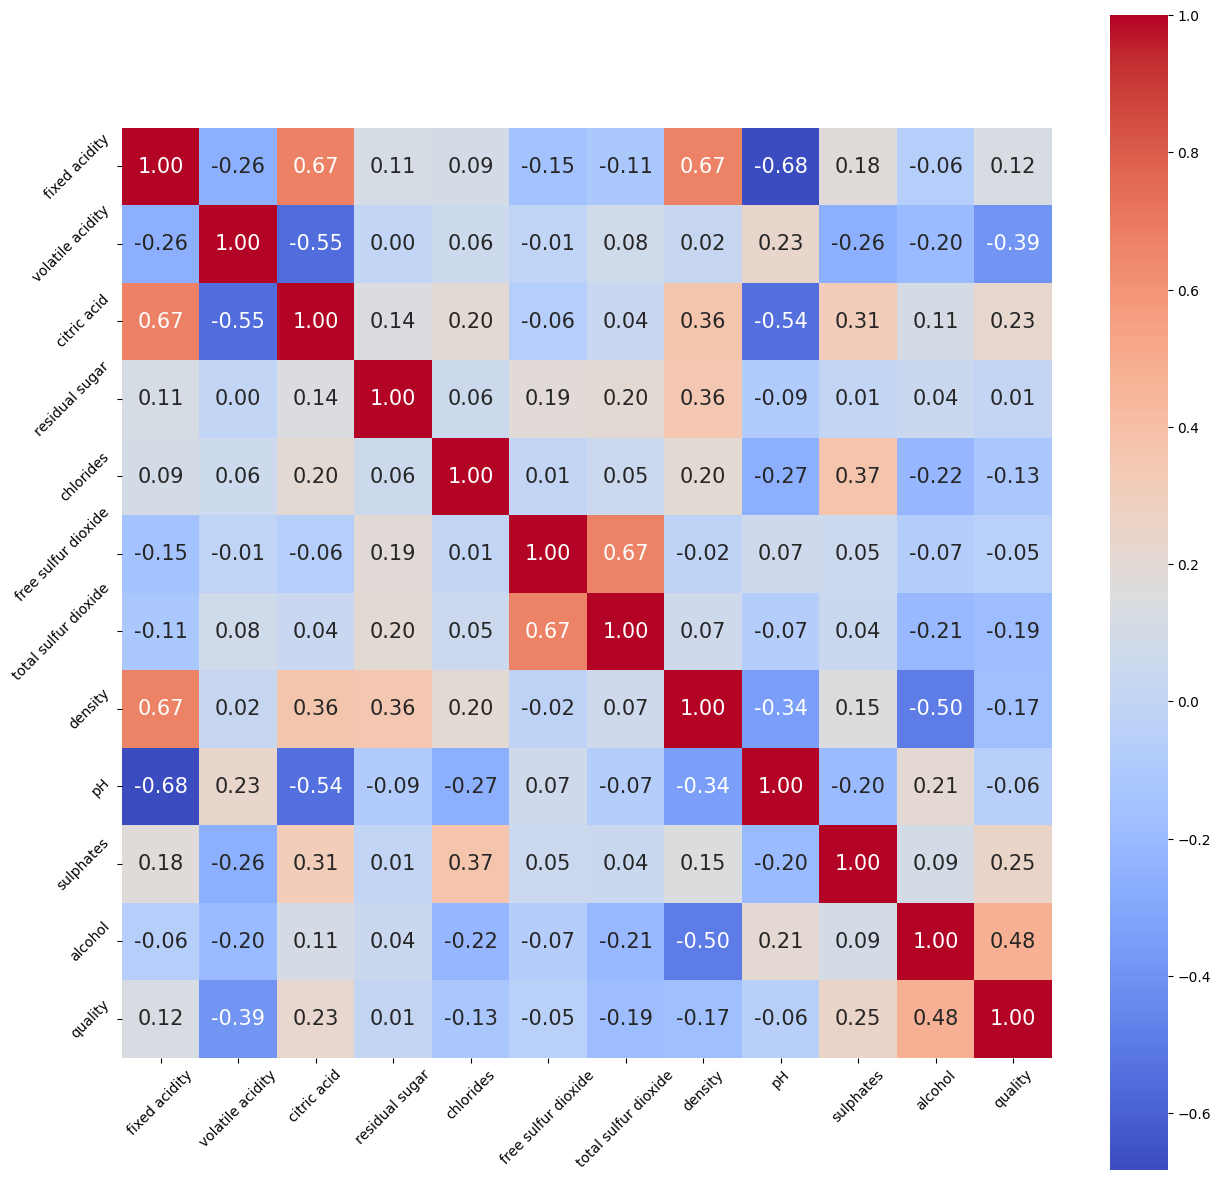

In [ ]:
#Resulta más intuitivo ver la matriz de correlación a través de un gráfico - heatmap de seaborn

plt.figure(figsize=(15,15)) #Defino el tamaño del grafico

#Genero el mapa de calor
sns.heatmap(correlation,
            cbar = True,
            square = True,
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm')

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#Feature binning-"agrupación de características"

In [ ]:
wine_quality.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:

#"Malos": (0 <= valor <= 3)
#"Regulares": (4 <= valor <= 6)
#"Buenos": (7 <= valor <= 10)

cortes = [0, 3, 6, 10]
nombres =  ["Malos", 'Regulares', 'Buenos']

# Agregar la columna 'quality_e' con las etiquetas
wine_quality['quality_e'] = pd.cut(wine_quality['quality'], bins=cortes, labels=nombres)

# Contar los valores de 'quality_e'
value_counts = wine_quality['quality_e'].value_counts().sort_values()

value_counts

,count
quality_e,
Malos,10
Buenos,217
Regulares,1372


In [ ]:
wine_quality

#el target tiene sentido que se aplique una codificación Ordinal

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_e
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Regulares
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Regulares
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Regulares
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Regulares
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Regulares
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Regulares
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Regulares
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Regulares
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Regulares


In [ ]:
# se recomienda analizar y estudiar a profundidad el siguiente  notebook:

# https://www.kaggle.com/code/kdsharma/predicting-wine-quality-88-accuracy

# Complemento 😉

#La prueba de Shapiro-Wilks
es una prueba que permite medir el grado de ajuste existente entre la distribución del conjunto de
datos analizados y una distribución normal. Su objetivo es validar que los datos
provienen de una población que tiene la distribución teórica especificada, es decir,
contrasta si las observaciones podrían razonablemente proceder de una
distribución gaussiana.
Con esta prueba se contrastó el nivel de significancia, si el p-value es
menor que 0,05 la distribución no es normal y si es mayor que 0,05 la distribución
se ajusta a la normal


Ho: Los datos provienen de una distribución normal.

Ha: Los datos no siguen una distribución normal.

In [ ]:
from scipy.stats import shapiro

#La variable density parece a simple vista ser normal, vamos a verificar esto con un  test estadístico
# Realizar el test  en density
# Se asume la distribución normal estándar como distribución de referencia


# Test de Shapiro
shapiro_test = shapiro(wine_quality["density"])
shapiro_pvalue = shapiro_test.pvalue

print(shapiro_pvalue)

#según el test realizado no es Normal (tomar esto con mucho cuidado), material de lectura https://towardsdatascience.com/stop-testing-for-normality-dba96bb73f90



1.936052131352189e-08


las pruebas de normalidad, son pruebas poco potentes cuando el tamaño de la muestra es pequeño. Al basarse en la hipótesis nula de normalidad, podemos no alcanzar significación estadística por falta de potencia estadística, asumiendo erróneamente que los datos siguen una distribución normal (al no poder rechazar la hipótesis nula).

Por otra parte, cuando la muestra es muy grande, ocurre lo contrario: será suficiente una pequeña desviación de la normalidad para que la prueba nos dé una p significativa y rechacemos la hipótesis nula, cuando la mayor parte de las técnicas paramétricas tolerarían pequeñas desviaciones de la normalidad si la muestra es grande.

Por estos motivos, es aconsejable completar siempre el análisis de normalidad con un método gráfico y no quedarnos solo con test estadísticos...


# QQ-PLOT

El gráfico de comparación de cuantiles, también conocido por su apodo en inglés, qqplot, representa los cuantiles de nuestra distribución frente a los cuantiles teóricos que tendría si siguiese una distribución normal con la misma media y distribución estándar que nuestros datos.

Si los datos siguen una distribución normal, se alinearán cerca de la diagonal del gráfico. Cuanto más se alejen, menos probable será que nuestros datos sigan una distribución normal.

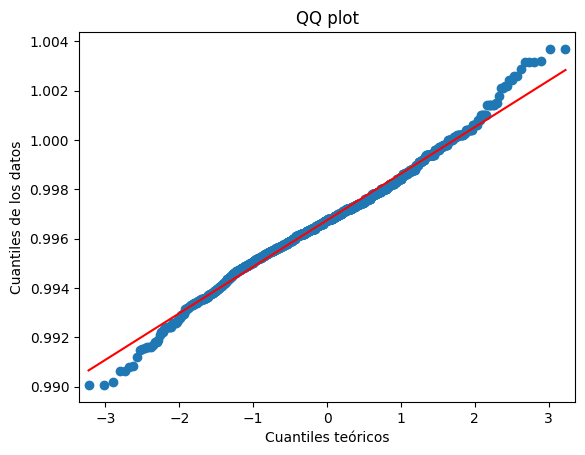

In [ ]:
# volvamos a wine_quality["density"] y veamos su qqplot

# Crear el QQ plot
sm.qqplot(wine_quality["density"], line='s')


plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.title('QQ plot')


plt.show()

#Una imagen vale más que mil palabras

En la clase de análisis univariado vamos a ver más a fondo los métodos analíticos. Estos se basan en el análisis del índice de simetría, curtosis, media, mediana,moda y desviación estandar.

Un histograma es una excelente herramienta visual para evaluar la distribución de un conjunto de datos y determinar si se asemeja a una distribución normal (también conocida como distribución gaussiana).

<Axes: xlabel='density', ylabel='Density'>

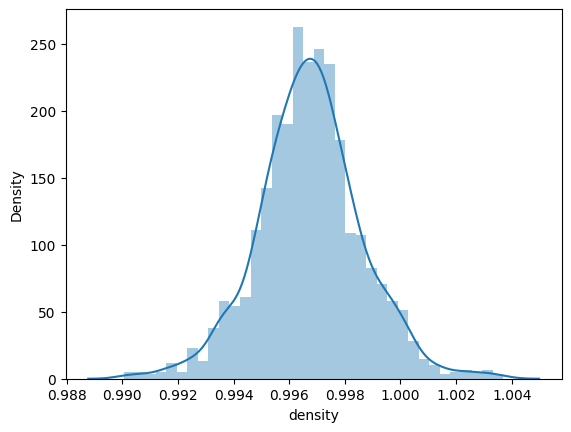

In [ ]:

distplot(wine_quality["density"])

## Outliers

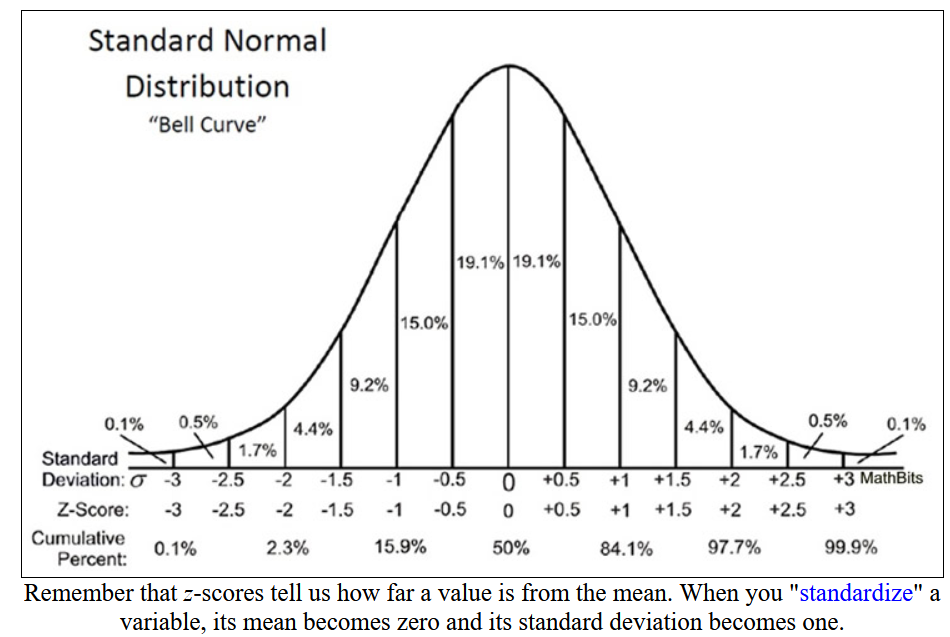



Asumiendo que los datos tienen una distribución normal (curva con forma de campana), Media +/- 3*DS (Desviación estándar) capturará el 99,7 % de las observaciones. Desde el punto de vista estadístico, cualquier valor que quede fuera de este rango se considera una anomalía.

eliminar los valores físicamente imposibles antes de detectar outliers es una buena práctica en el proceso de detección de anomalías. Esto se debe a que algunos valores pueden ser claramente incorrectos o inconsistentes con el dominio del problema, lo que indica que se trata de errores en los datos en lugar de valores atípicos genuinos.

Antes de aplicar técnicas más avanzadas de detección de outliers, como el cálculo de z-scores o el uso de métodos estadísticos o de aprendizaje automático, es recomendable realizar una validación básica de los datos para eliminar valores que sean físicamente imposibles.

Por ejemplo, en el contexto de los pesos de una persona, podrías eliminar valores negativos, valores iguales a cero o valores extremadamente altos o bajos que no sean realistas para el dominio específico.

Una vez que hayas eliminado estos valores físicamente imposibles, puedes proceder con técnicas más sofisticadas de detección de outliers para identificar patrones inusuales o anómalos en los datos restantes. Esto ayudará a mejorar la calidad de los resultados y a obtener una detección más precisa de las anomalías en tus datos.


In [ ]:
# variable objetivo wine_quality["density"]


# Calculamos el z-score
wine_quality["density_Z"] = (wine_quality["density"] - wine_quality["density"].mean())/wine_quality["density"].std()
# Creamos una variable para marcar los outliers
wine_quality["density_outliers"]= 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
wine_quality.loc[(wine_quality['density_Z']>3)|(wine_quality['density_Z']<-3) , 'density_outliers'] = 1
# Veamos los resultados
wine_quality[['density', 'density_Z','density_outliers']]

,density,density_Z,density_outliers
0,0.99780,0.558100,0
1,0.99680,0.028252,0
2,0.99700,0.134222,0
3,0.99800,0.664069,0
4,0.99780,0.558100,0
...,...,...,...
1594,0.99490,-0.978459,0
1595,0.99512,-0.861893,0
1596,0.99574,-0.533387,0
1597,0.99547,-0.676446,0


In [ ]:
# Veamos los casos marcados
wine_quality['density_outliers'].value_counts()

,count
density_outliers,
0,1581
1,18


In [ ]:
wine_quality[wine_quality['density_outliers']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_e,density_Z,density_outliers
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7,Buenos,3.419279,1
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5,Regulares,3.101370,1
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,Regulares,3.392786,1
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,Regulares,3.392786,1
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,Regulares,3.392786,1
608,10.1,0.650,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,6,Regulares,3.101370,1
836,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,Buenos,-3.235611,1
837,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,Buenos,-3.235611,1
889,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5,Regulares,3.255026,1
1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6,Regulares,-3.537625,1


In [ ]:
q1 = np.percentile(wine_quality['density'], 25)
q3 = np.percentile(wine_quality['density'], 75)
iqr = q3 - q1

In [ ]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5* iqr

In [ ]:
wine_quality[(wine_quality['density'] < limite_inferior) | (wine_quality['density']> limite_superior)]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_e,density_Z,density_outliers
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,Regulares,-2.726957,0
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,Regulares,-2.726957,0
294,13.3,0.340,0.52,3.20,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6,Regulares,2.465552,0
324,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6,Regulares,2.518537,0
325,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6,Regulares,2.518537,0
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5,Regulares,2.677492,0
354,6.1,0.210,0.40,1.40,0.066,40.5,165.0,0.99120,3.25,0.59,11.900000,6,Regulares,-2.938897,0
364,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7,Buenos,2.889431,0
366,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7,Buenos,2.889431,0
374,14.0,0.410,0.63,3.80,0.089,6.0,47.0,1.00140,3.01,0.81,10.800000,6,Regulares,2.465552,0


In [ ]:
# se recomienda leer para profundizar en el tema https://www.usc.gal/caa/MetAnalisisStgo1/enologia.pdf